# INFO 2950 Fall 2025 Main Project 


**Research Question:** Is there a negative association between unemployment rate and opinions about ethnicities?

In [19]:
# imported like similar to homeworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
# import duckdb
import requests
from bs4 import BeautifulSoup
import time

## Upload/Import data

In [20]:
unemployment_df = pd.read_csv("UnemploymentData.csv", header = None)
ethno_df = pd.read_csv("The Guide to Public Opinion and Electoral Behavior.csv")

#check
print(unemployment_df.head(15))
ethno_df.head(10)
#Note : real data starts at the 11th line of data set of first

                                                   0   \
0   Labor Force Statistics from the Current Popula...   
1                                 Original Data Value   
2                                                 NaN   
3                                          Series Id:   
4                                 Seasonally Adjusted   
5                                       Series title:   
6                                 Labor force status:   
7                                       Type of data:   
8                                                Age:   
9                                              Years:   
10                                                NaN   
11                                               Year   
12                                               1964   
13                                               1965   
14                                               1966   

                          1    2    3    4    5    6    7    8    9    10  \
0         

,Demographics,Subgroup,Total Cases,Year,Whites,Blacks,Chicanos/Hispanics,Asian-Americans
0,All,All,1532,1964,84.7,63.8,NaN,NaN
1,All,All,1273,1966,84.4,63.2,NaN,NaN
2,All,All,1503,1968,81.1,64.7,NaN,NaN
3,All,All,1469,1970,77.2,61.5,NaN,NaN
4,All,All,2120,1972,78.2,64.0,NaN,NaN
5,All,All,1525,1974,79.1,65.5,NaN,NaN
6,All,All,1869,1976,73.7,60.8,55.5,NaN
7,All,All,1382,1980,77.4,64.2,57.8,NaN
8,All,All,1321,1982,72.8,63.8,NaN,NaN
9,All,All,1902,1984,74.2,64.2,59.4,NaN


## Cleaning data for graphing the relationships


In [22]:
new_header = unemployment_df.iloc[11].tolist()
unemployment_data = unemployment_df[12:].copy()
unemployment_data.columns = new_header
unemployment_data.reset_index(drop = True, inplace = True)

if 'Year' not in unemployment_data.columns:
    unemployment_data.rename(columns={unemployment_data.columns[0]: 'Year'}, inplace = True)

#same type(numbers that we can work with)
month_cols = [col for col in unemployment_data.columns if col not in ['Year', 'Average Unemployment Rate']]
for col in month_cols:
    unemployment_data[col] = pd.to_numeric(unemployment_data[col], errors = 'coerce')

#yearly average unemployment rate
unemployment_data['Average Unemployment Rate'] = unemployment_data[month_cols].mean(axis = 1)

unemployment_data['Year'] = pd.to_numeric(unemployment_data['Year'], errors = 'coerce')

unemployment_cleaned = unemployment_data[['Year', 'Average Unemployment Rate']].dropna()

unemployment_cleaned['Year'] = unemployment_cleaned['Year'].astype(int)

#over lapping years
voting_years = [1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996,2000, 2004, 2008, 2012, 2016, 2020, 2024]
unemplo_voting = unemployment_cleaned[unemployment_cleaned['Year'].isin(voting_years)]


unemplo_voting.head(20)

,Year,Average Unemployment Rate
0,1964,5.158333
4,1968,3.558333
8,1972,5.600000
12,1976,7.700000
16,1980,7.175000
20,1984,7.508333
24,1988,5.491667
28,1992,7.491667
32,1996,5.408333
36,2000,3.966667


In [23]:
ethno_df = pd.read_csv("The Guide to Public Opinion and Electoral Behavior.csv")

ethno_avg = ethno_df[ethno_df['Subgroup'] == 'All']
print(np.unique(ethno_df['Subgroup']))
ethno_df = ethno_df[ethno_df['Subgroup'].isin(['White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic', 'Other/Multiple races, non-Hispanic'])]
# ethno_avg = ethno_df.groupby('Year', as_index = False).mean(numeric_only = True)

# the above line is wrong bc the subgroups are not just the different races
# either way the average is included in the dataset under the 'All' subgroup

# print(ethno_df.head())
print(ethno_avg.head())
print(ethno_df.head())

['18-29' '18-29 Democrats' '18-29 Hispanics' '18-29 Independents'
 '18-29 Republicans' '18-29 blacks' '18-29 in Nonsouth' '18-29 in South'
 '18-29 men' '18-29 others' '18-29 whites' '18-29 women' '30-44'
 '30-44 Democrats' '30-44 Hispanics' '30-44 Independents'
 '30-44 Republicans' '30-44 blacks' '30-44 in Nonsouth' '30-44 in South'
 '30-44 men' '30-44 others' '30-44 whites' '30-44 women' '45-59'
 '45-59 Democrats' '45-59 Hispanics' '45-59 Independents'
 '45-59 Republicans' '45-59 blacks' '45-59 in Nonsouth' '45-59 in South'
 '45-59 men' '45-59 others' '45-59 whites' '45-59 women' '60+'
 '60+ Democrats' '60+ Hispanics' '60+ Independents' '60+ Republicans'
 '60+ blacks' '60+ in Nonsouth' '60+ in South' '60+ men' '60+ others'
 '60+ whites' '60+ women' 'All' 'Black Democrats' 'Black Independents'
 'Black Republicans' 'Black men' 'Black women' 'Black, non-Hispanic'
 'Blacks in Nonsouth' 'Blacks in South' 'College grad+'
 'College grad+ Democrats' 'College grad+ Hispanics'
 'College grad+ I

In [24]:
merged_df = pd.merge(ethno_df, unemplo_voting, on='Year', how='inner').sort_values('Year').reset_index(drop  = True)
merged_df.to_csv("merged_ethno_unemployment.csv", index = False)
# print out first couple

merged_df.head(20)

,Demographics,Subgroup,Total Cases,Year,Whites,Blacks,Chicanos/Hispanics,Asian-Americans,Average Unemployment Rate
0,race,"White, non-Hispanic",1367,1964,86.7,60.7,NaN,NaN,5.158333
1,race,"Black, non-Hispanic",155,1964,66.8,91.9,NaN,NaN,5.158333
2,race,"Black, non-Hispanic",144,1968,67.9,91.5,NaN,NaN,3.558333
3,race,"White, non-Hispanic",1344,1968,82.4,61.7,NaN,NaN,3.558333
4,race,"Other/Multiple races, non-Hispanic",3,1968,NaN,NaN,NaN,NaN,3.558333
5,race,Hispanic,12,1968,NaN,NaN,NaN,NaN,3.558333
6,race,"White, non-Hispanic",1871,1972,79.7,61.2,NaN,NaN,5.600000
7,race,"Black, non-Hispanic",208,1972,64.9,89.8,NaN,NaN,5.600000
8,race,"Other/Multiple races, non-Hispanic",15,1972,NaN,NaN,NaN,NaN,5.600000
9,race,Hispanic,26,1972,NaN,NaN,NaN,NaN,5.600000


## Graphs 

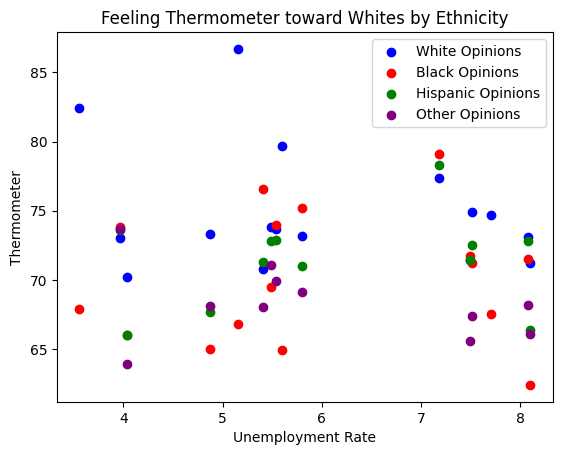

In [31]:
white_opinions = merged_df[merged_df['Subgroup'] == 'White, non-Hispanic']
black_opinions = merged_df[merged_df['Subgroup'] == 'Black, non-Hispanic']
hisp_opinions = merged_df[merged_df['Subgroup'] == 'Hispanic']
other_opinions = merged_df[merged_df['Subgroup'] == 'Other/Multiple races, non-Hispanic']


plt.scatter(white_opinions['Average Unemployment Rate'], white_opinions['Whites'], label='White Opinions', color='blue', marker='o')

plt.scatter(black_opinions['Average Unemployment Rate'], black_opinions['Whites'], label='Black Opinions', color='red', marker='o')

plt.scatter(hisp_opinions['Average Unemployment Rate'], hisp_opinions['Whites'], label='Hispanic Opinions', color='green', marker='o')

plt.scatter(other_opinions['Average Unemployment Rate'], other_opinions['Whites'], label='Other Opinions', color='purple', marker='o')


# Add labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Thermometer')
plt.legend()
plt.title('Feeling Thermometer toward Whites by Ethnicity')
plt.show()

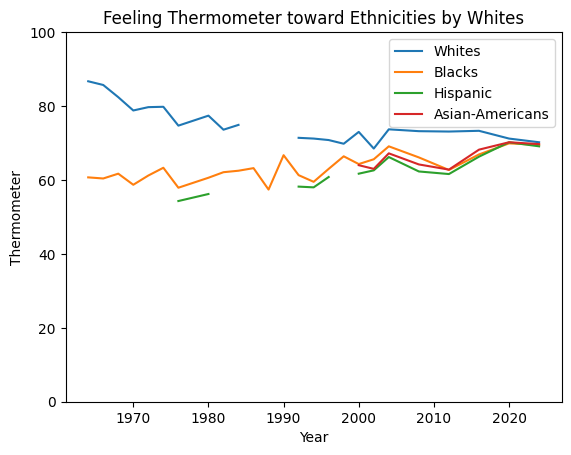

In [39]:
x = white_opinions['Year']
y1 = white_opinions['Whites']
y2 = white_opinions['Blacks']
y3 = white_opinions['Chicanos/Hispanics']
y4 = white_opinions['Asian-Americans']

plt.plot(x, y1, label = 'Whites')
plt.plot(x, y2, label = 'Blacks')
plt.plot(x, y3, label = 'Hispanic')
plt.plot(x, y4, label = 'Asian-Americans')


plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('Feeling Thermometer toward Ethnicities by Whites')
plt.legend()
plt.ylim(0, 100)
plt.show()

## Data Description

Limitation: There are many entries with missing data, espeically for hispanic and asian-american data

○ What are the observations (rows) and the attributes (columns)?

In the merged dataset, each row represents one U.S. election year between 1964 and 2024. The columns include the year itself, the average feeling thermometer ratings for Whites, Blacks, Chicanos/Hispanics, and Asian-Americans from the ANES survey (on a 0–100 scale), and the average unemployment rate for that same year. After cleaning and merging both datasets, each observation now captures a snapshot of how public sentiment toward different racial and ethnic groups aligns with the economic conditions of that year.

○ Why was this dataset created?

ANES: to provide a decades-long time series of political data

Unemployoment: as a part of long-term time series of American economic data

○ Who funded the creation of the dataset?

ANES: it was originally funded by the Social Science Research Council (SSRC) starting 1948 and has been funded by the National Science Foundation (NSF) since 1977

Unemployment: the US government

○ What processes might have influenced what data was observed and recorded and what was not?

- ANES: Data are collected through large-scale national surveys conducted during election years. Because they are self-reported, responses may be influenced by social desirability bias or changes in public willingness to express prejudice over time. The survey is only conducted during election years, meaning public sentiment between elections is not captured. Changes in question wording or sampling methods across decades could also influence comparability.
- unemployment Data:Collected monthly through the Current Population Survey (CPS) , which samples approximately 60,000 U.S. households. While highly reliable,the BLS’s estimates are influenced by survey design,seasonal adjustments, and revisions to population benchmarks. Some underreporting may occur among informal or underemployed workers.


○ What preprocessing was done, and how did the data come to be in the form that you are using?

**Unemployment data:**
- The raw file contained metadata and monthly unemployment rates for each year (1964–2024).  
- We extracted the correct header row, converted monthly values to numeric, and computed a **mean annual unemployment rate**.  
- Data were filtered to **election years** to align with ANES survey timing. That was the overlapping infprmation from both graphs.

**ANES data:**
- The original dataset includes multiple demographic subgroups (e.g., Party ID, Gender, Race, Region).  
- We selected the thermometer ratings toward each racial/ethnic group and computed the **average score per year** across all respondents.  
- The data were merged with the unemployment data using Years as the key.

- Merged dataset saved as merged_ethno_unemployment.csv for reproducibility.  
- Missing values removed or averaged where appropriate.
- graphed relationship between the 2 databases

○ If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

* For the ANES data,people filled out the surveys on purpose and knew their answers would be used for research about politics and social issues. All personal info was removed, and the data follows research privacy rules.
* For the unemployment data, it comes from the Bureau of Labor Statistics’ monthly household survey. The people who answer know it’s used to make national job and labor stats.Their answers stay private and anonymous before the data is shared.

○ Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box)

ANES: https://drive.google.com/file/d/1VFH3B7z9E5zRGBdcsGC6vQKR5-7jxuEr/view?usp=drive_link

Unemployment: https://drive.google.com/file/d/1haAEoGKuEPW-39RTB2X9z-0yUoFewnCf/view?usp=drive_link